<p style="background-color:#f0f8ff;font-family:Arial;color:#2c3e50;font-size:300%;text-align:center;border-radius:40px 40px;"> Customer Churn Analysis & Prediction📊</p>


## ***Data Exploration***

> ### ***import necessery Libraries***


In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt-
import seaborn as sns
import missingno as msno

# Model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder , OrdinalEncoder
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

# Model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score


import pickle



>### ***Read CSV File***

In [ ]:
data = pd.read_csv(r"C:\Users\soad atef\Desktop\Final project Data Science-DEPI\credit_card_churn.csv" , usecols=lambda column: column not in ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
                                                                                   , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


>### ***Shape of data***

In [3]:
data.shape
print(f'The number of rows (Observations) : {data.shape[0]}')
print(f'The number of columns (Features) : {data.shape[1]}')

The number of rows (Observations) : 10127
The number of columns (Features) : 21


> ### ***Columns***

In [4]:
columns = pd.DataFrame(data.columns , columns=['Column Name'])
columns

,Column Name
0,CLIENTNUM
1,Attrition_Flag
2,Customer_Age
3,Gender
4,Dependent_count
5,Education_Level
6,Marital_Status
7,Income_Category
8,Card_Category
9,Months_on_book


## The Targer is > (***Attrition_Flag***)

> ### ***dtypes of The data***

In [5]:
dtypes = pd.DataFrame(data.dtypes , columns=['Data type']).reset_index(names=['Column Name'])
dtypes

,Column Name,Data type
0,CLIENTNUM,int64
1,Attrition_Flag,object
2,Customer_Age,int64
3,Gender,object
4,Dependent_count,int64
5,Education_Level,object
6,Marital_Status,object
7,Income_Category,object
8,Card_Category,object
9,Months_on_book,int64


>### ***Data Information***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

> ### ***Chek nulls & drop it***

<Axes: >

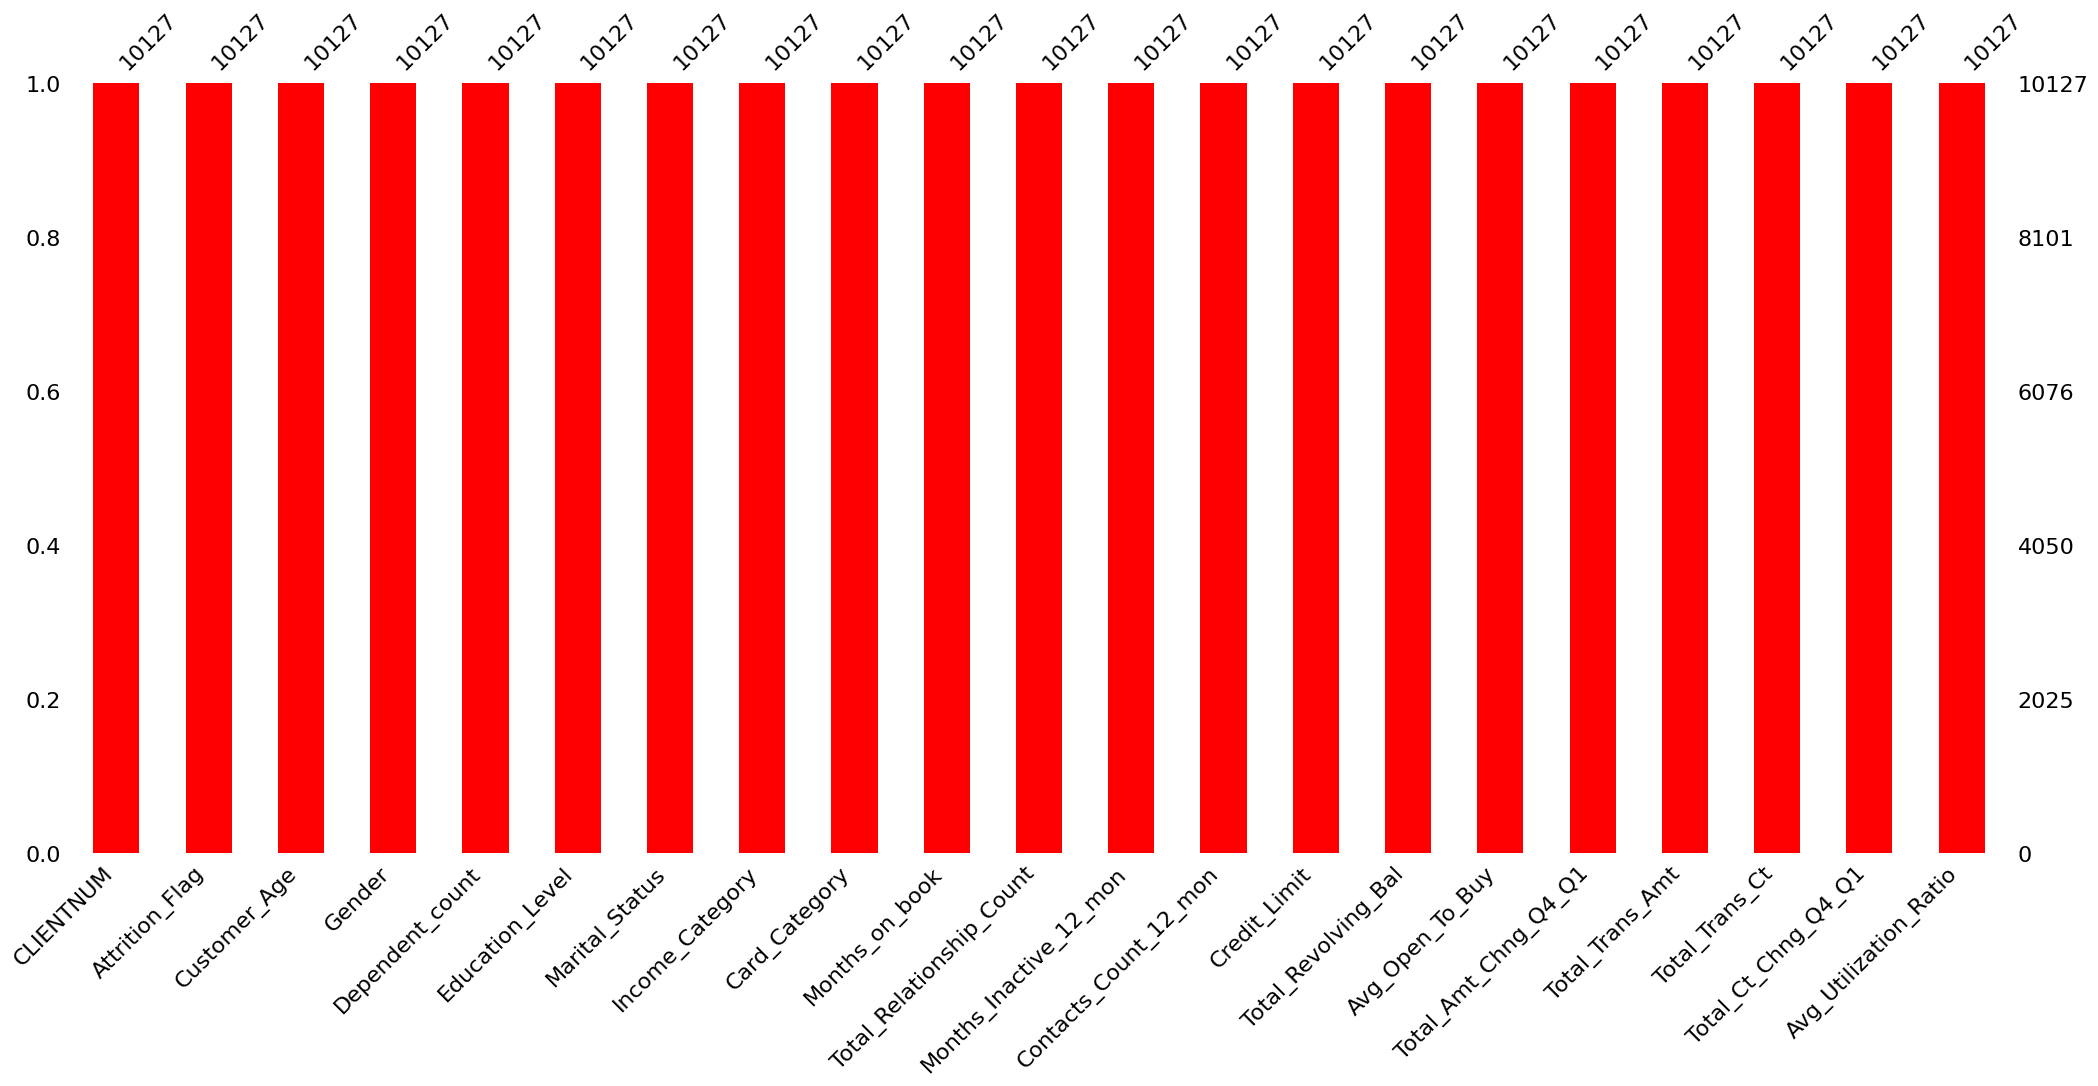

In [7]:
msno.bar(data,color='red')

In [8]:
pd.DataFrame({'Number of Missing Values':data.isnull().sum(),'Percentage Of Missing Values (%)':(data.isnull().sum() / data.shape[0]) * 100})

,Number of Missing Values,Percentage Of Missing Values (%)
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0


> ### ***Chek duplicated values***

In [9]:
data[data.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


> ### ***descriptive statistics***

>> numerical columns

In [10]:
data.describe(include='number').T.style.highlight_max(subset=['mean'	,'std'	,'min'	,'25%'	,'50%'	,'75%'	,'max'],color='green')

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


>>Categrical columns

In [11]:
data.describe(exclude='number').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h1><b><i>Data Analysis and Visualization</i></b></h1>
</div>

<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h2><b><i>EDA</i></b> & <b><i>Visualization📊</i></b></h2>
</div>


### ***Validating data types & Updating data types***


In [12]:
# Validating data types & Updating data types
dtypes

,Column Name,Data type
0,CLIENTNUM,int64
1,Attrition_Flag,object
2,Customer_Age,int64
3,Gender,object
4,Dependent_count,int64
5,Education_Level,object
6,Marital_Status,object
7,Income_Category,object
8,Card_Category,object
9,Months_on_book,int64


In [13]:
data.drop(columns=['CLIENTNUM'],
                     inplace=True)

> ### ***Select categorical and numerical columns***

In [14]:
cat_columns = list(data.select_dtypes(exclude=['number']).columns)
numerical_columns = list(data.select_dtypes(include='number'))
print(f"Categrical columns >> {cat_columns} <<")
print(f"Numerical columns >> {numerical_columns} <<")
data[cat_columns] = data[cat_columns].astype('category')


Categrical columns >> ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] <<
Numerical columns >> ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] <<


> ## ***Independent Feature Analysis & Linking Features to Target Variable***

In [15]:
# The number of Categries in Each Columns
for n,i in enumerate(cat_columns , start=1) :
    print(f'{n}-The number of Categories in "{i}" is {data[i].nunique()} and The Categries is > {data[i].unique()}\n ')

1-The number of Categories in "Attrition_Flag" is 2 and The Categries is > ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
 
2-The number of Categories in "Gender" is 2 and The Categries is > ['M', 'F']
Categories (2, object): ['F', 'M']
 
3-The number of Categories in "Education_Level" is 7 and The Categries is > ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
 
4-The number of Categories in "Marital_Status" is 4 and The Categries is > ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
 
5-The number of Categories in "Income_Category" is 6 and The Categries is > ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$6

## Define Value counts function

In [16]:
def value_counts(data, column):
    value_counts = data[column].value_counts(normalize=True, dropna=False) * 100
    formatted_data = pd.DataFrame({
        'Count': data[column].value_counts(dropna=False),
        'Percentage (%)': value_counts.round(2)
    }).reset_index()

    formatted_data.columns = [column.capitalize(), 'Count', 'Percentage (%)']

    return formatted_data.style.highlight_max(subset=['Count', 'Percentage (%)'])


In [ ]:
for col in cat_columns:
    print(f'The {col} Value counts')
    display(value_counts(data , col))


The Attrition_Flag Value counts


,Attrition_flag,Count,Percentage (%)
0,Existing Customer,8500,83.930000
1,Attrited Customer,1627,16.070000


The Attrition_Flag Value counts by Target(Attrition_Flag)
The Gender Value counts


,Gender,Count,Percentage (%)
0,F,5358,52.910000
1,M,4769,47.090000


The Gender Value counts by Target(Attrition_Flag)
The Education_Level Value counts


,Education_level,Count,Percentage (%)
0,Graduate,3128,30.890000
1,High School,2013,19.880000
2,Unknown,1519,15.000000
3,Uneducated,1487,14.680000
4,College,1013,10.000000
5,Post-Graduate,516,5.100000
6,Doctorate,451,4.450000


The Education_Level Value counts by Target(Attrition_Flag)
The Marital_Status Value counts


,Marital_status,Count,Percentage (%)
0,Married,4687,46.280000
1,Single,3943,38.940000
2,Unknown,749,7.400000
3,Divorced,748,7.390000


The Marital_Status Value counts by Target(Attrition_Flag)
The Income_Category Value counts


,Income_category,Count,Percentage (%)
0,Less than $40K,3561,35.160000
1,$40K - $60K,1790,17.680000
2,$80K - $120K,1535,15.160000
3,$60K - $80K,1402,13.840000
4,Unknown,1112,10.980000
5,$120K +,727,7.180000


The Income_Category Value counts by Target(Attrition_Flag)
The Card_Category Value counts


,Card_category,Count,Percentage (%)
0,Blue,9436,93.180000
1,Silver,555,5.480000
2,Gold,116,1.150000
3,Platinum,20,0.200000


The Card_Category Value counts by Target(Attrition_Flag)


In [18]:
data.groupby('Gender')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Gender                                    F             M
Customer_Age             max      67.000000     73.000000
                         min      26.000000     26.000000
                         mean     46.456887     46.178863
Dependent_count          max       5.000000      5.000000
                         min       0.000000      0.000000
                         mean      2.340612      2.352485
Months_on_book           max      56.000000     56.000000
                         min      13.000000     13.000000
                         mean     35.979097     35.871462
Total_Relationship_Count max       6.000000      6.000000
                         min       1.000000      1.000000
                         mean      3.807951      3.817782
Months_Inactive_12_mon   max       6.000000      6.000000
                         min       0.000000      0.000000
                         mean      2.351810      2.329209
Contacts_Count_12_mon    max       6.000000      6.000000
                         min       0.000000      0.000000
                         mean      2.413587      2.502202
Credit_Limit             max   34516.000000  34516.000000
                         min    1438.300000   1438.300000
                         mean   5023.854274  12685.674963
Total_Revolving_Bal      max    2517.000000   2517.000000
                         min       0.000000      0.000000
                         mean   1140.011198   1188.433215
Avg_Open_To_Buy          max   34516.000000  34516.000000
                         min       3.000000     15.000000
                         mean   3883.843076  11497.241749
Total_Amt_Chng_Q4_Q1     max       2.368000      3.397000
                         min       0.000000      0.000000
                         mean      0.754417      0.766147
Total_Trans_Amt          max   17437.000000  18484.000000
                         min     510.000000    530.000000
                         mean   4324.318216   4493.706228
Total_Trans_Ct           max     138.000000    139.000000
                         min      12.000000     10.000000
                         mean     66.352370     63.180541
Total_Ct_Chng_Q4_Q1      max       3.714000      3.571000
                         min       0.000000      0.000000
                         mean      0.713525      0.710759
Avg_Utilization_Ratio    max       0.999000      0.994000
                         min       0.000000      0.000000
                         mean      0.341957      0.199548

* This analysis highlights that while most behaviors are similar between genders, there are notable differences in credit limit, available credit, and credit utilization patterns.

In [19]:
data.groupby('Income_Category')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Income_Category                     $120K +   $40K - $60K   $60K - $80K  \
Customer_Age             max      62.000000     73.000000     63.000000   
                         min      26.000000     26.000000     26.000000   
                         mean     47.603851     46.087151     45.968616   
Dependent_count          max       5.000000      5.000000      5.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.462173      2.308380      2.440086   
Months_on_book           max      54.000000     56.000000     56.000000   
                         min      13.000000     13.000000     13.000000   
                         mean     36.891334     35.873184     35.597004   
Total_Relationship_Count max       6.000000      6.000000      6.000000   
                         min       1.000000      1.000000      1.000000   
                         mean      3.778542      3.783240      3.833809   
Months_Inactive_12_mon   max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.331499      2.294413      2.329529   
Contacts_Count_12_mon    max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.537827      2.460894      2.455777   
Credit_Limit             max   34516.000000  23981.000000  34516.000000   
                         min    1438.300000   1438.300000   1438.300000   
                         mean  19717.322558   5462.259832  10758.772967   
Total_Revolving_Bal      max    2517.000000   2517.000000   2517.000000   
                         min       0.000000      0.000000      0.000000   
                         mean   1222.196699   1171.994413   1154.993581   
Avg_Open_To_Buy          max   34516.000000  23981.000000  34516.000000   
                         min     250.000000      3.000000     61.000000   
                         mean  18495.125860   4290.265419   9603.779387   
Total_Amt_Chng_Q4_Q1     max       1.975000      2.357000      3.355000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.752459      0.759531      0.772189   
Total_Trans_Amt          max   16695.000000  17744.000000  18484.000000   
                         min     602.000000    569.000000    530.000000   
                         mean   4529.467675   4405.618994   4450.712553   
Total_Trans_Ct           max     139.000000    131.000000    134.000000   
                         min      10.000000     11.000000     10.000000   
                         mean     63.704264     65.000559     63.247504   
Total_Ct_Chng_Q4_Q1      max       2.000000      2.750000      3.500000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.688702      0.711113      0.720776   
Avg_Utilization_Ratio    max       0.856000      0.999000      0.976000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.125307      0.316561      0.206075   

Income_Category                $80K - $120K  Less than $40K       Unknown  
Customer_Age             max      63.000000       70.000000     68.000000  
                         min      27.000000       26.000000     26.000000  
                         mean     46.428013       46.297950     46.274281  
Dependent_count          max       5.000000        5.000000      5.000000  
                         min       0.000000        0.000000      0.000000  
                         mean      2.492508        2.263690      2.275180  
Months_on_book           max      56.000000       56.000000     56.000000  
                         min      13.000000       13.000000     13.000000  
                         mean     36.074267       35.881775     35.753597  
Total_Relation

## ***Feature Engineering***

> ## Convert 'Total_Ct_Chng_Q4_Q1' into a categorical feature

In [20]:
# Define the bins and labels for categorization
bins = [-float('inf'), 0.99, 1.01, float('inf')]
labels = ['Decreased', 'Stable', 'Increased']

# Apply pd.cut to categorize the changes
data['Transaction_Change_Category'] = pd.cut(data['Total_Ct_Chng_Q4_Q1'], bins=bins, labels=labels)
data[['Total_Ct_Chng_Q4_Q1','Transaction_Change_Category']]

,Total_Ct_Chng_Q4_Q1,Transaction_Change_Category
0,1.625,Increased
1,3.714,Increased
2,2.333,Increased
3,2.333,Increased
4,2.500,Increased
...,...,...
10122,0.857,Decreased
10123,0.683,Decreased
10124,0.818,Decreased
10125,0.722,Decreased


# ***Data Visualization***

> ## ***Data distribution***

>> ### ***distribution of numerical features***

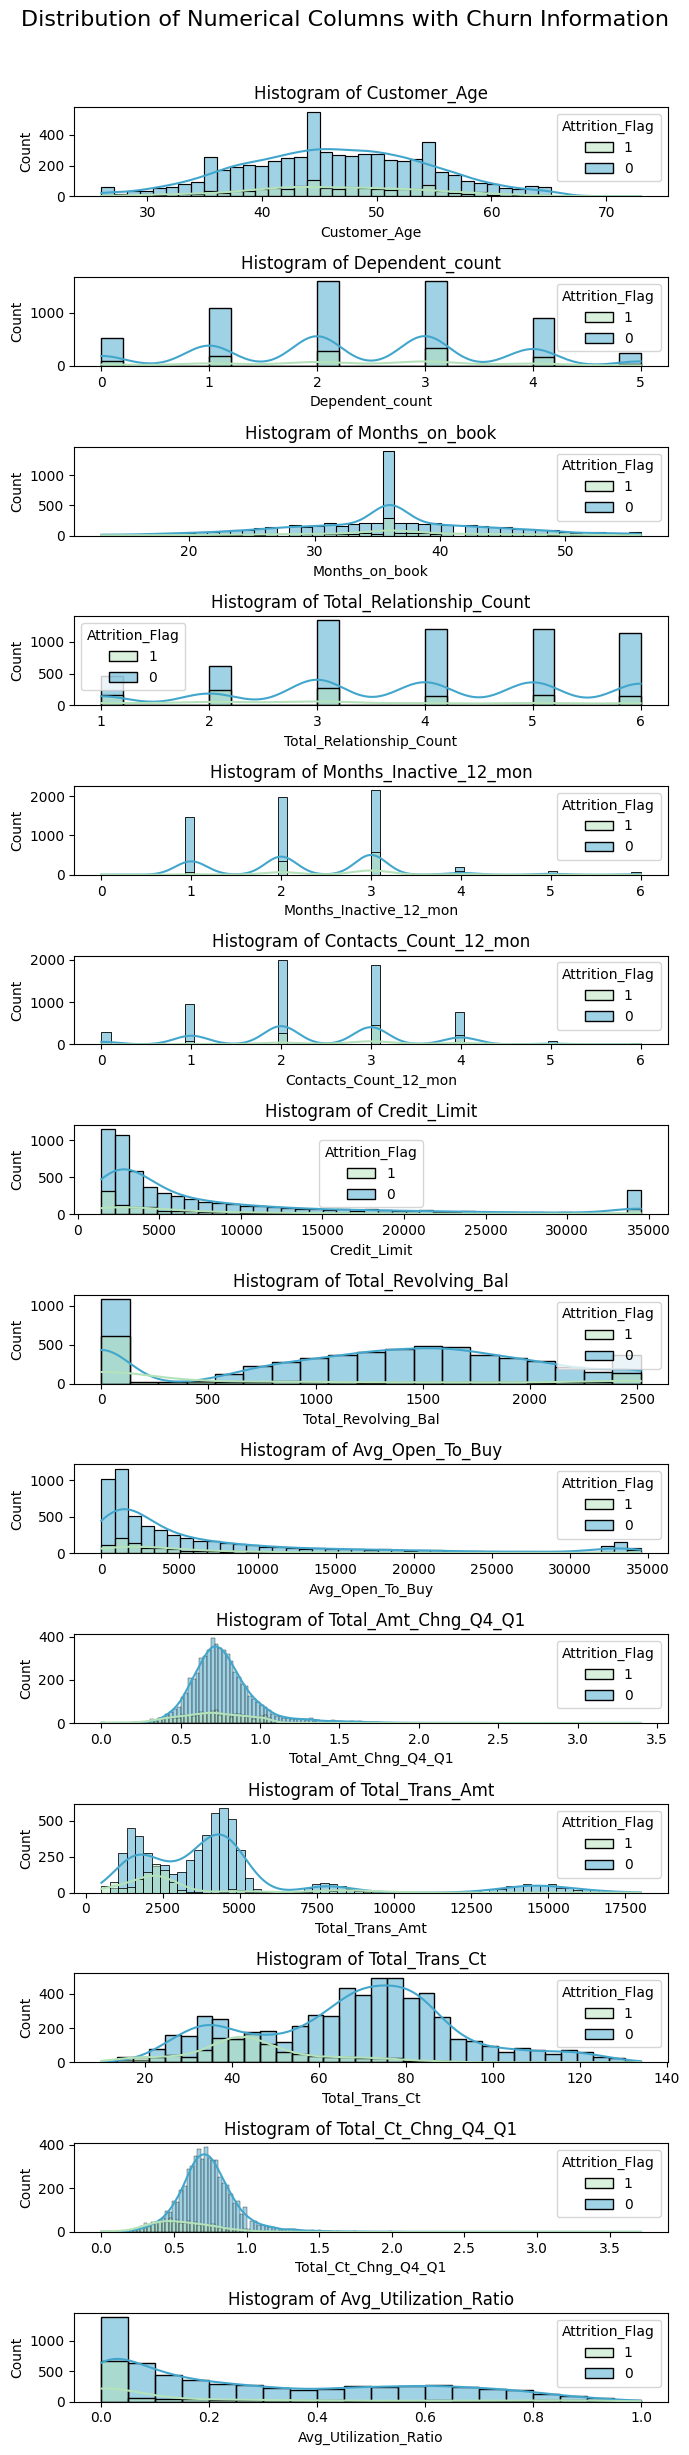

In [55]:
fig, axes = plt.subplots(14, 1, figsize=(7, 25))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, hue='Attrition_Flag', palette='GnBu')
    axes[i].set_title(f'Histogram of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


## ***Boxplot***

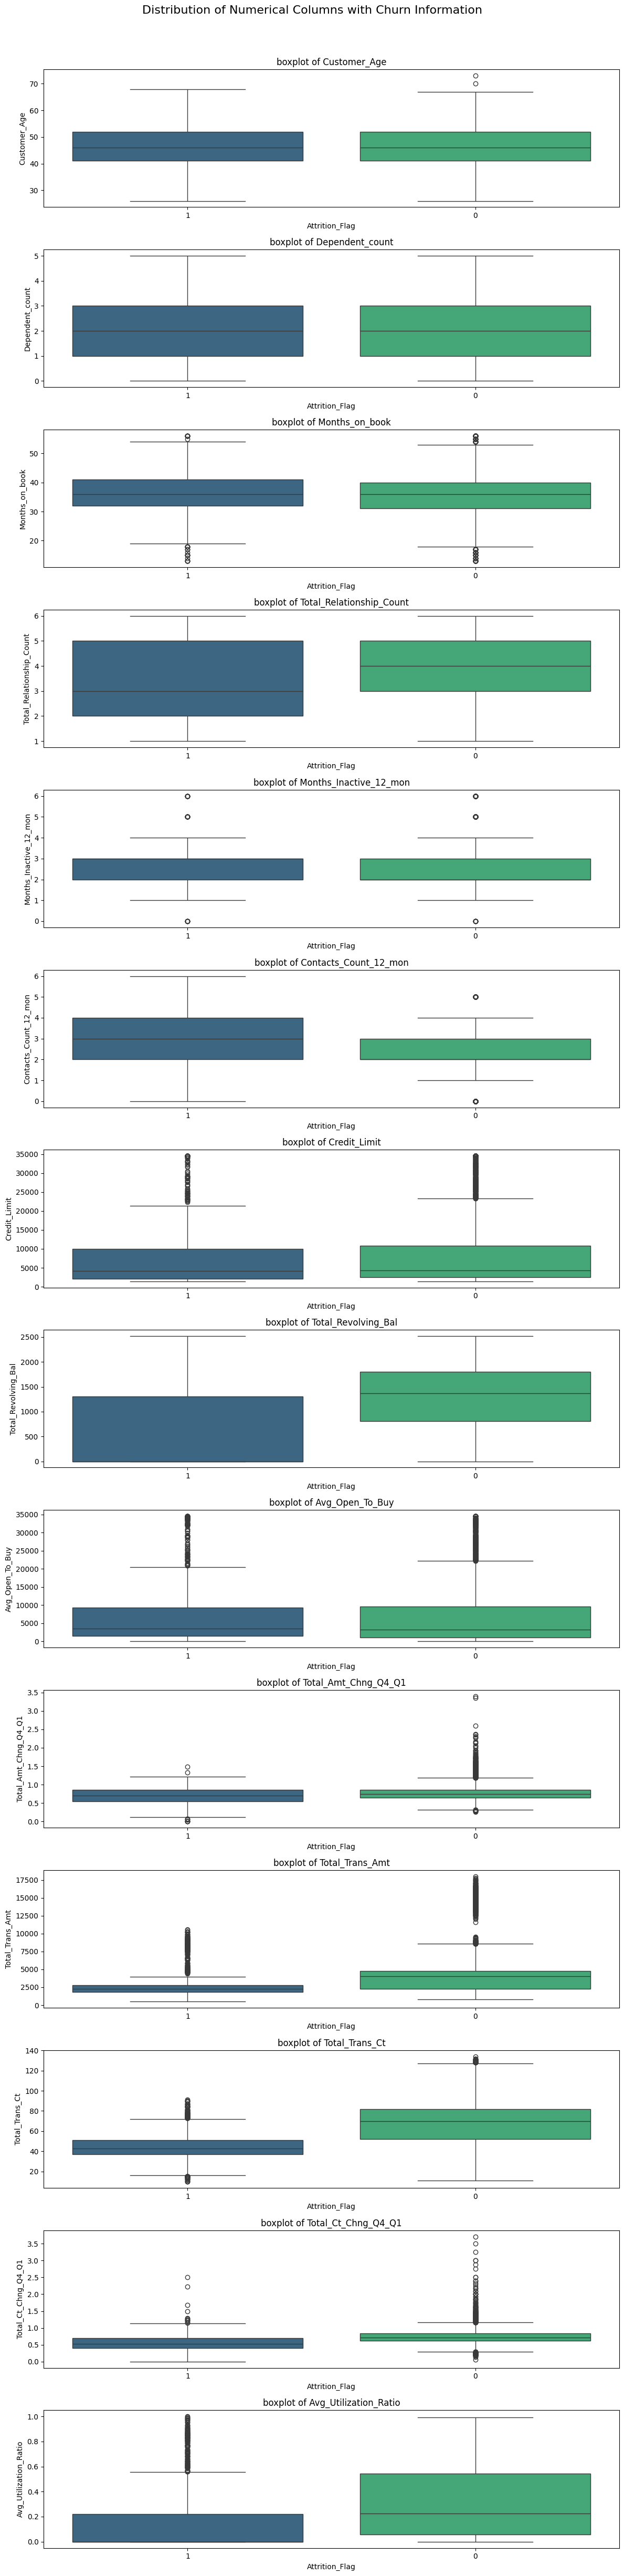

In [56]:
fig, axes = plt.subplots(14, 1, figsize=(12, 50))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i],x='Attrition_Flag',palette='viridis')
    axes[i].set_title(f'boxplot of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


> ## ***distribution of Categorical data***

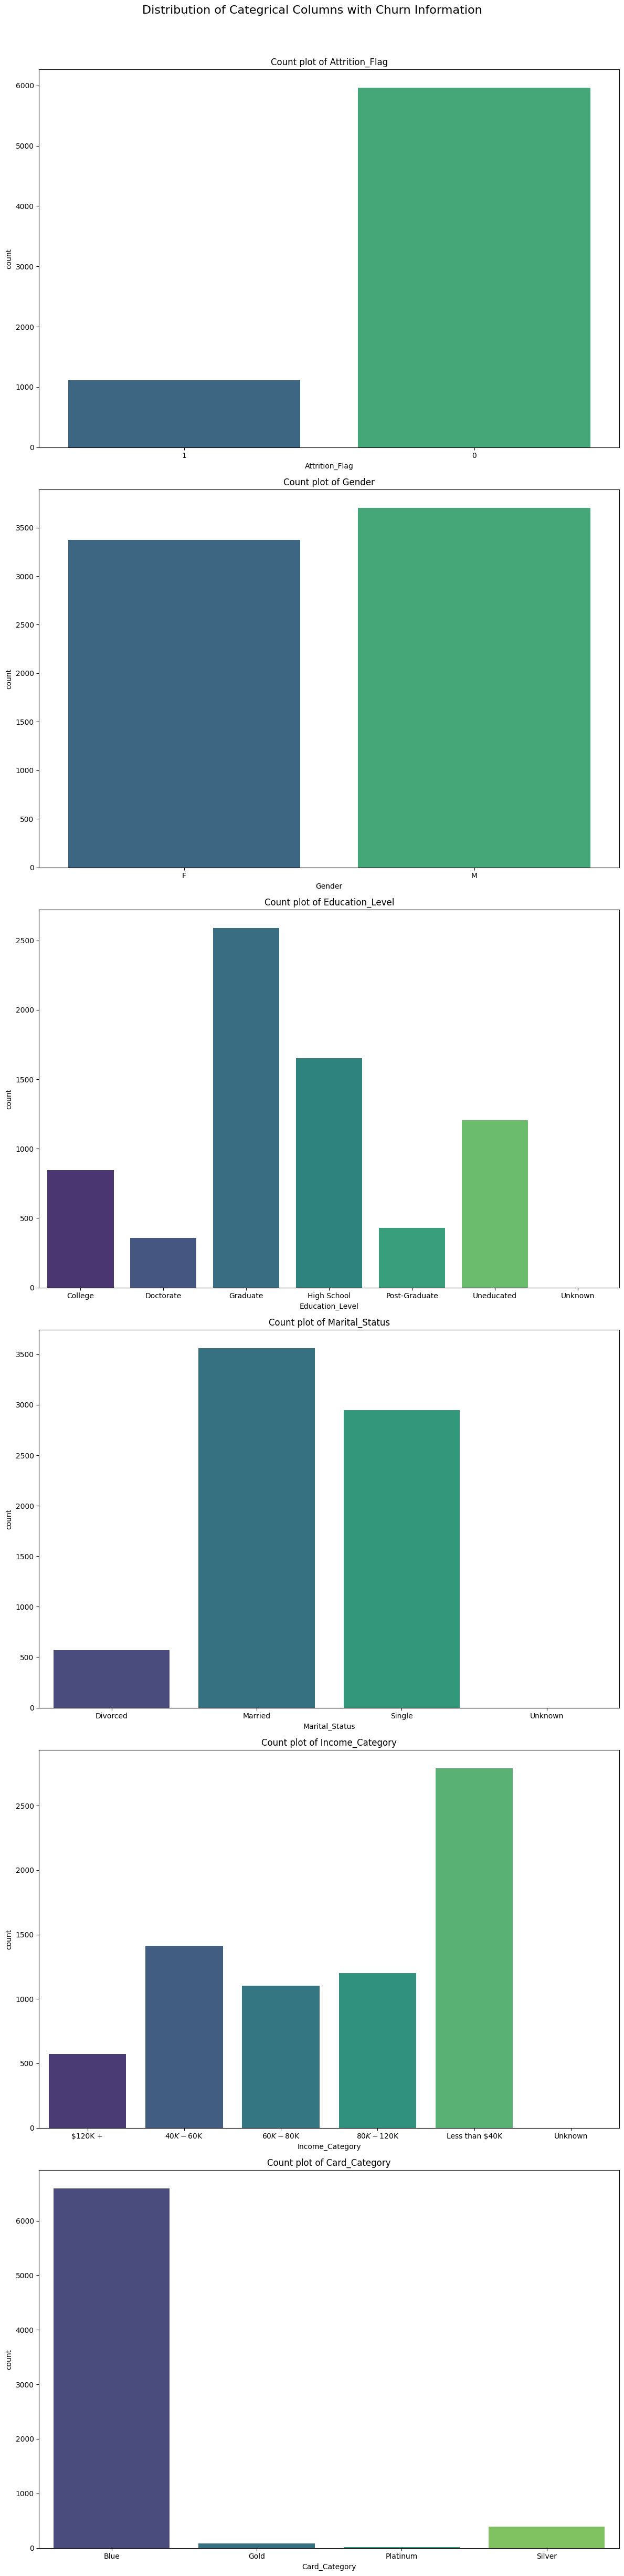

In [57]:
fig, axes = plt.subplots(6, 1, figsize=(12, 50))

# Plot histograms for each numerical column
for i, col in enumerate(cat_columns):
    sns.countplot(data=data, x = col, ax=axes[i],palette='viridis')
    axes[i].set_title(f'Count plot of {col}')

# Add the suptitle
fig.suptitle('Distribution of Categrical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


<Axes: xlabel='Transaction_Change_Category', ylabel='count'>

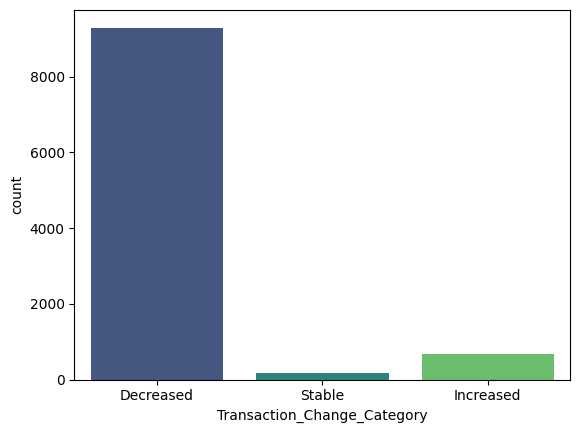

In [25]:
sns.countplot(data , x = 'Transaction_Change_Category',palette='viridis' )

### ***Numerical Features by Churn Status***

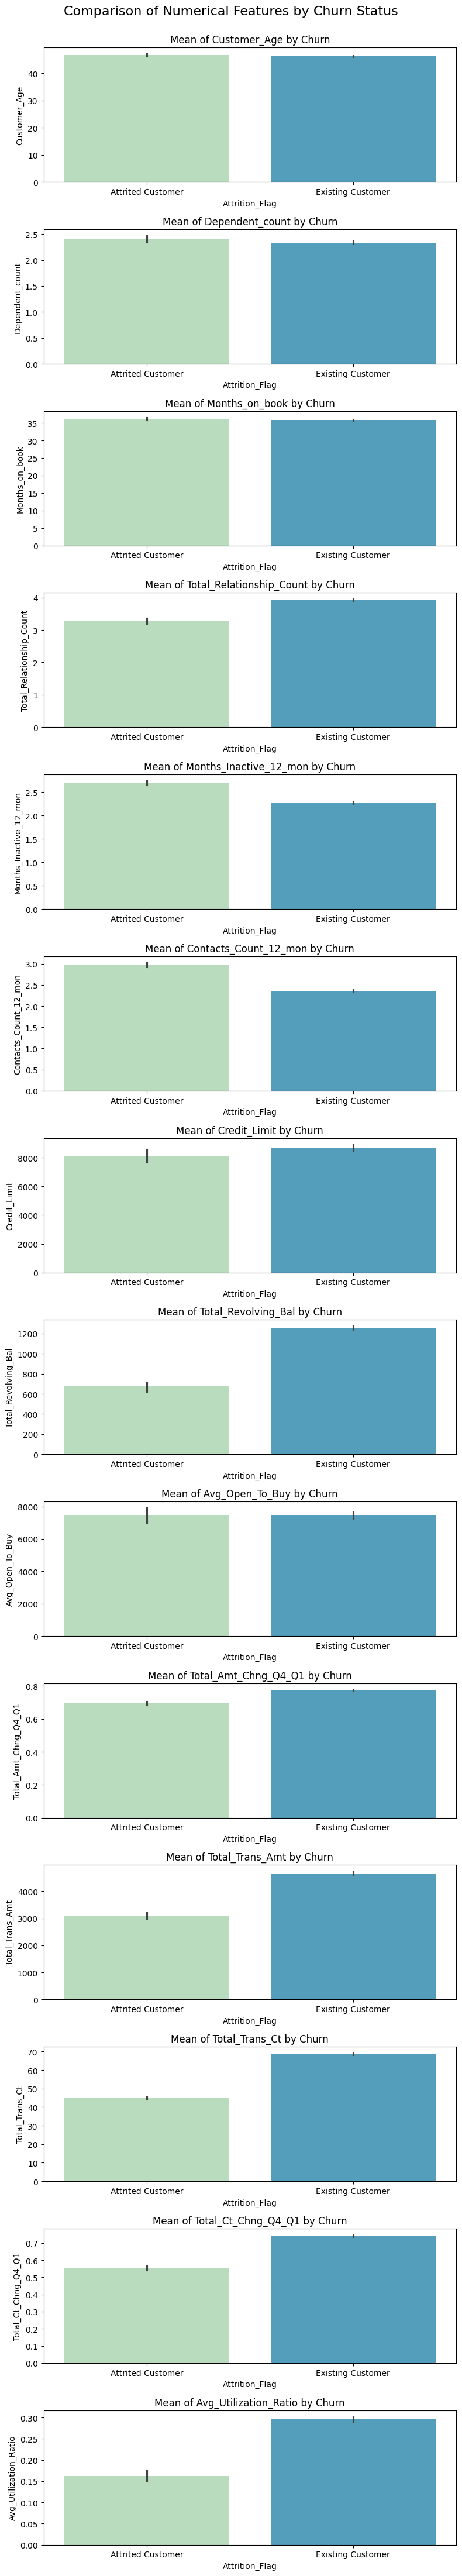

In [26]:
fig, axes = plt.subplots(14, 1, figsize=(8, 44))

for i, col in enumerate(numerical_columns):
    sns.barplot(data=data, x='Attrition_Flag', y=col, ax=axes[i], palette='GnBu')
    axes[i].set_title(f'Mean of {col} by Churn', fontsize=12)

fig.suptitle('Comparison of Numerical Features by Churn Status', fontsize=16 , y =1)

plt.tight_layout()
plt.show()


### ***Customer Age vs. Average Utilization Ratio***

Text(619.8146770833333, 0.5, 'Average Utilization Ratio')

<Figure size 1600x1200 with 0 Axes>

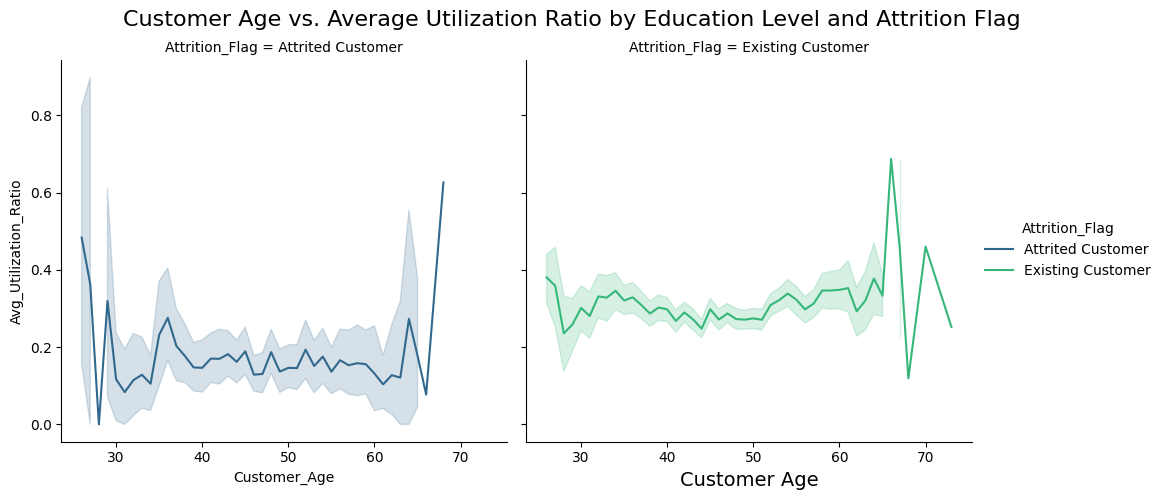

In [27]:
plt.figure(figsize=(16, 12))
sns.relplot(
    data=data,
    x='Customer_Age',
    y='Avg_Utilization_Ratio',
    hue='Attrition_Flag',
    palette='viridis',
    col='Attrition_Flag',
    kind='line',
)

plt.suptitle('Customer Age vs. Average Utilization Ratio by Education Level and Attrition Flag', fontsize=16)
plt.subplots_adjust(top=0.88)

plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Average Utilization Ratio', fontsize=14)


In [28]:
# sns.pairplot(data)

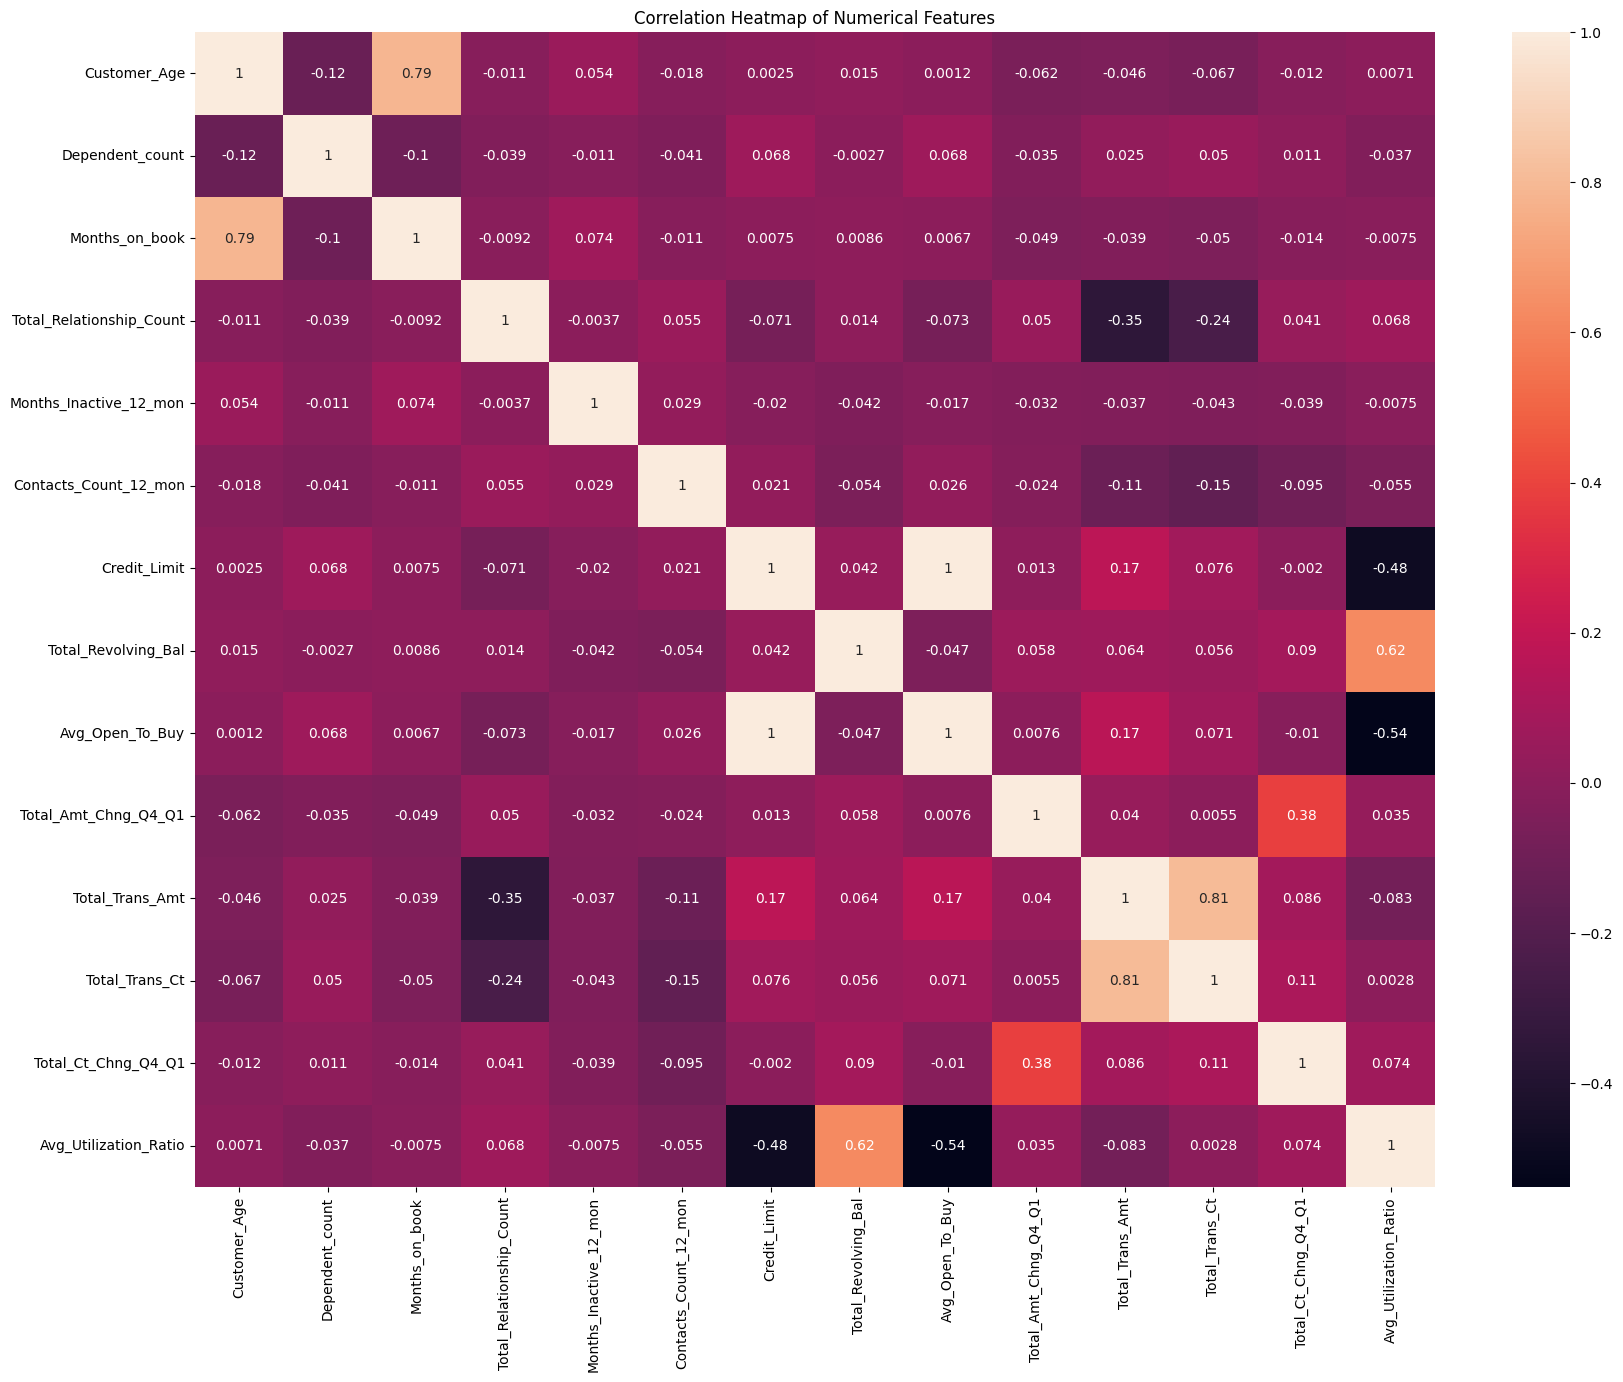

In [29]:
# Plotting the correlation heatmap for numerical features
plt.figure(figsize=(20, 15))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [30]:
data.drop('Transaction_Change_Category',axis=1,inplace=True)

# **Customer Attrition Prediction Model**



## ***1. Data Preprocessing: Encoding, Scaling & Splitting The Data***




In [31]:
data = data[(data['Income_Category'] != 'Unknown') & (data['Education_Level'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')].copy()

In [32]:
# Create a mapping dictionary
mapping = {'Attrited Customer': 1,
           'Existing Customer': 0}
# Apply mapping to convert column to numeric
data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)

In [33]:
# Split the data into features (X) and target (y)
X = data.drop("Attrition_Flag", axis=1) 
y = data["Attrition_Flag"] 

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***Encoding*** 

In [35]:
# 2. Initialize encoders
le_gender = LabelEncoder()

# Define OrdinalEncoder for income with specified order
income_categories = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
income_encoder = OrdinalEncoder(categories=[income_categories], handle_unknown='use_encoded_value', unknown_value=-1)

# Define OrdinalEncoder for card category with specified order
card_categories = [['Blue', 'Silver', 'Gold', 'Platinum']]
card_encoder = OrdinalEncoder(categories=card_categories, handle_unknown='use_encoded_value', unknown_value=-1)

# 3. Apply encoding
# Gender Encoding
X_train['Gender'] = le_gender.fit_transform(X_train['Gender'])
X_test['Gender'] = le_gender.transform(X_test['Gender'])

# Education Level One-Hot Encoding
education_train = pd.get_dummies(X_train['Education_Level'], prefix='Education')
education_test = pd.get_dummies(X_test['Education_Level'], prefix='Education')

# Marital Status One-Hot Encoding
marital_train = pd.get_dummies(X_train['Marital_Status'], prefix='Marital')
marital_test = pd.get_dummies(X_test['Marital_Status'], prefix='Marital')

# Income Category Ordinal Encoding
X_train['Income_Category'] = income_encoder.fit_transform(X_train[['Income_Category']])
X_test['Income_Category'] = income_encoder.transform(X_test[['Income_Category']])

# Card Category Ordinal Encoding
X_train['Card_Category'] = card_encoder.fit_transform(X_train[['Card_Category']])
X_test['Card_Category'] = card_encoder.transform(X_test[['Card_Category']])

# 4. Merge encoded columns and remove original columns
X_train = pd.concat([X_train, education_train, marital_train], axis=1)
X_test = pd.concat([X_test, education_test, marital_test], axis=1)

# Drop original columns that were converted to one-hot encoding
X_train = X_train.drop(['Education_Level', 'Marital_Status'], axis=1)
X_test = X_test.drop(['Education_Level', 'Marital_Status'], axis=1)


# Align columns order
X_test = X_test[X_train.columns]

### Another Method to Encodin 


In [36]:
# # Function to encode categorical features in the training set
# def object_to_int_train(dataframe_series):
#     if dataframe_series.dtype == 'category' or dataframe_series.dtype == 'object':
#         le = LabelEncoder()
#         return le.fit_transform(dataframe_series), le  # Returning the encoder for deployment
#     return dataframe_series, None

# # Function to encode categorical features in the test set using pre-trained encoders
# def object_to_int_test(dataframe_series, encoder):
#     if encoder:
#         return encoder.transform(dataframe_series)
#     return dataframe_series

# # Applying label encoding to the training and test data
# for col in X_train.columns:
#     X_train[col], encoder = object_to_int_train(X_train[col])
#     if encoder:
#         # Saving the encoder for deployment
#         X_test[col] = object_to_int_test(X_test[col], encoder)

# ***Scaling*** 

In [37]:
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## ***Check data imbalance***

<Axes: xlabel='Attrition_Flag', ylabel='count'>

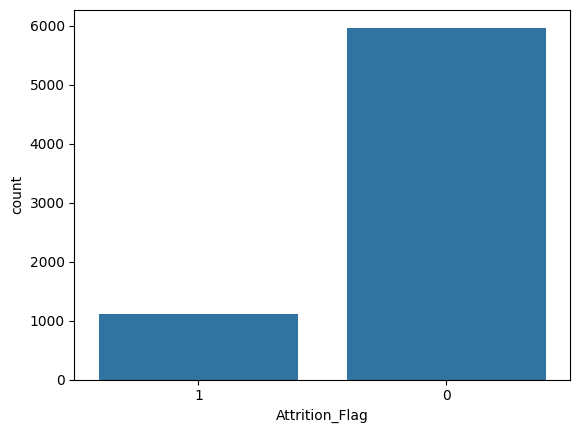

In [38]:
sns.countplot(data=data ,x='Attrition_Flag' )

## ***Handling Class Imbalance using SMOTE***

In [39]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

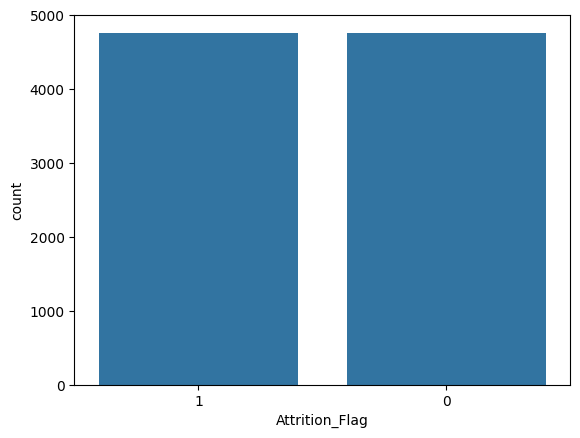

In [40]:
sns.countplot(x = y_train)

# ***Build Model*** 

In [41]:
# Define each model separately
random_forest_model = RandomForestClassifier(random_state=42)
logistic_regression_model = LogisticRegression()
svc_model = SVC()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)
y_pred_test_rf = random_forest_model.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Train the Logistic Regression model
logistic_regression_model.fit(X_train, y_train)
y_pred_test_lr = logistic_regression_model.predict(X_test)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

# Train the SVC model
svc_model.fit(X_train, y_train)
y_pred_test_svc = svc_model.predict(X_test)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

# Train the KNN model
knn_model.fit(X_train, y_train)
y_pred_test_knn = knn_model.predict(X_test)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)
y_pred_test_dt = decision_tree_model.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# Print accuracy results and classification reports
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.3f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_test_rf))

print(f"Logistic Regression Test Accuracy: {accuracy_test_lr:.3f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test_lr))

print(f"SVC Test Accuracy: {accuracy_test_svc:.3f}")
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_test_svc))

print(f"KNN Test Accuracy: {accuracy_test_knn:.3f}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

print(f"Decision Tree Test Accuracy: {accuracy_test_dt:.3f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_test_dt))


Random Forest Test Accuracy: 0.959
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1205
           1       0.86      0.87      0.86       212

    accuracy                           0.96      1417
   macro avg       0.92      0.92      0.92      1417
weighted avg       0.96      0.96      0.96      1417

Logistic Regression Test Accuracy: 0.890
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1205
           1       0.61      0.73      0.67       212

    accuracy                           0.89      1417
   macro avg       0.78      0.82      0.80      1417
weighted avg       0.90      0.89      0.89      1417

SVC Test Accuracy: 0.934
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1205
           1       0.76      

# ***Optimization***

In [42]:
# Define param grids for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200],
    'penalty': ['l2', 'none']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distance measure
}

param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV for each model
models = {
    'RandomForestClassifier': (random_forest_model, param_grid_rf),
    'LogisticRegression': (logistic_regression_model, param_grid_lr),
    'SVC': (svc_model, param_grid_svc),
    'KNN': (knn_model, param_grid_knn),
    'DecisionTreeClassifier': (decision_tree_model, param_grid_dt)
}


# Perform GridSearchCV for each model and save the best estimator
for name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Predict using the best model from GridSearchCV
    y_pred_test = grid_search.best_estimator_.predict(X_test)
    
    # Calculate accuracy on test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"{name} Test Accuracy: {accuracy_test:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Save the best estimator to a pickle file
    file_name = f"{name}_best_model.pkl"
    with open(file_name, 'wb') as file:
        pickle.dump(grid_search.best_estimator_, file)
    print(f"{name} best model saved as '{file_name}'")
    
    print("-" * 60)


Performing GridSearchCV for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier Test Accuracy: 0.9584
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1205
           1       0.85      0.88      0.86       212

    accuracy                           0.96      1417
   macro avg       0.91      0.93      0.92      1417
weighted avg       0.96      0.96      0.96      1417

RandomForestClassifier best model saved as 'RandomForestClassifier_best_model.pkl'
------------------------------------------------------------
Performing GridSearchCV for LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
LogisticRegression Test Accuracy: 0.8920
LogisticRegression Classification Report:
              precision    recall  f1-score   support

     

In [43]:
for model_name, (model, param_grid) in models.items():
    model.fit(X_train, y_train)
    model_filename = f"best_{model_name.lower()}_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)

In [44]:
# # Define parameter grids
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# param_grid_lr = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.1, 1, 10, 100],
#     'solver': ['lbfgs', 'saga']
# }

# param_grid_svc = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# param_grid_dt = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }

# # Apply GridSearchCV to each model
# # Random Forest
# grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')
# grid_rf.fit(X_train, y_train)
# best_rf = grid_rf.best_estimator_

# # Logistic Regression
# grid_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy')
# grid_lr.fit(X_train, y_train)
# best_lr = grid_lr.best_estimator_

# # SVC
# grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, cv=5, scoring='accuracy')
# grid_svc.fit(X_train, y_train)
# best_svc = grid_svc.best_estimator_

# # KNN
# grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
# grid_knn.fit(X_train, y_train)
# best_knn = grid_knn.best_estimator_

# # Decision Tree
# grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')
# grid_dt.fit(X_train, y_train)
# best_dt = grid_dt.best_estimator_

# # Evaluate models with best parameters
# models = {'Random Forest': best_rf, 'Logistic Regression': best_lr, 'SVC': best_svc, 'KNN': best_knn, 'Decision Tree': best_dt}

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} Test Accuracy: {accuracy:.4f}")
#     print(f"{name} Classification Report:")
#     print(classification_report(y_test, y_pred))
